In [14]:
%%HTML
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>

C:\Users\takeh\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log


parameter -> [-2.38923249e+01  1.49544578e+01 -3.70439458e+00  4.55438680e-01
 -2.78524442e-02  6.78865027e-04  1.77856369e-01]


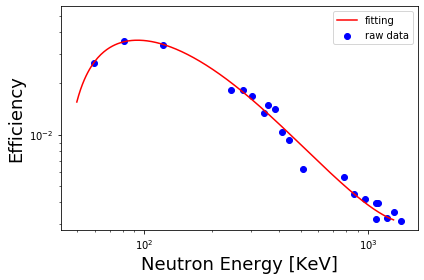

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import numpy as np

reference = "../reference/"#プログラムで読み取るファイルを入れるフォルダ

xdata = []
ydata = []

x = []
for i in range(50,1300):
    x.append(i)


f = open(reference + "/efficiency.txt")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split("\t")
    xdata.append(float(s[0]))
    ydata.append(float(s[1]))
#     print(s[0],s[1])
    line = f.readline()
f.close


##### フィッティングする関数y=f(x)の定義
def func(x, a0, a1, a2, a3 , a4, a5, E):
    return a0 + a1*np.log(x/E) + a2*(np.log(x/E))**2 + a3*(np.log(x/E))**3 + a4*(np.log(x/E))**4 + a5*(np.log(x/E))**5

##### 最適化するy=f(x)の係数の初期値
prameter_initial = np.array([1, 1, 1, 1, 1, 1, 1])

##### 最適化の計算[2]
popt, pcov = curve_fit(func, xdata, ydata, p0= prameter_initial)
print ("parameter ->", popt)

##### 最適化後のy=f(x)の関数
# y = func(xdata, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])
y = func(x, *popt)

##### 生データと最適化後の関数をグラフにプロット
# 元の生データを点プロット
plt.scatter(xdata, ydata, c='blue', label='raw data')
# 最適化後のフィット関数を線でプロット
plt.plot(x, y, 'r-',label = "fitting")

##### グラフ表示のオプション設定 #####
plt.xlabel('Neutron Energy [KeV]', fontsize=18)     # x軸の名称とフォントサイズ
plt.ylabel('Efficiency', fontsize=18)     # y軸の名称とフォントサイズ
plt.yscale("log")                # y軸のスケールをログに指定
plt.xscale("log")  
# plt.ylim([1e15,1e20])            # y軸のレンジの範囲を指定
#plt.rcParams["font.size"]=16    # 全体のフォントを変更
plt.legend(loc='upper right')    # ラベルを右上に記載
plt.tight_layout()               # タイトルを重ねない
plt.show()                       # グラフをプロット
# plt.savefig("optimize_fit.png")  # 画像をファイルで保存

['Ta-181', 'MF=10 MT= 16 (n,2n) reaction  ', 0.0, '7.618990E+6 ', 73, 180, 'Ta', '0.9998799', '180.94788', 1.3010969421813588e-31]
['Ta-181', 'MF=10 MT= 16 (n,2n) reaction  ', 77.1, '7.696520E+6 ', 73, 180, 'Ta', '0.9998799', '180.94788', 8.349128465268153e-32]
['Ta-181', 'MF=10 MT= 28 (n,np) reaction  ', 0.0, '5.981970E+6 ', 72, 180, 'Hf', '0.9998799', '180.94788', 1.9441373528807472e-36]
['Ta-181', 'MF=10 MT= 28 (n,np) reaction  ', 1141.5, '7.129830E+6 ', 72, 180, 'Hf', '0.9998799', '180.94788', 3.2730986695557404e-38]
['Ta-181', 'MF=10 MT= 32 (n,nd) reaction  ', 0.0, '1.117390E+7 ', 72, 179, 'Hf', '0.9998799', '180.94788', 5.699478420594116e-43]
['Ta-181', 'MF=10 MT= 32 (n,nd) reaction  ', 375.0, '1.155110E+7 ', 72, 179, 'Hf', '0.9998799', '180.94788', 1.1308729177434712e-44]
['Ta-181', 'MF=10 MT= 32 (n,nd) reaction  ', 1105.7, '1.228580E+7 ', 72, 179, 'Hf', '0.9998799', '180.94788', 4.3049192080002683e-47]
['Ta-181', 'MF=10 MT= 41 (n,2np) reaction ', 0.0, '1.341090E+7 ', 72, 179, '

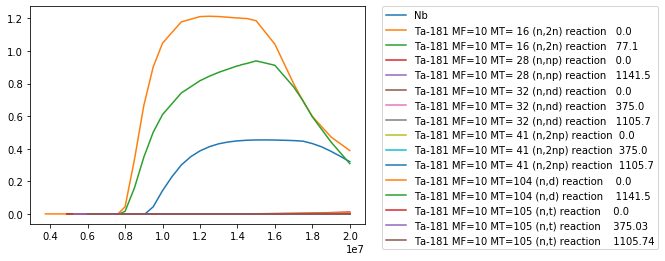

In [35]:
##MF10から使える反応を抽出しreactionリストをつくる[元素記号-原子番号、反応の種類、順位、閾値、娘核の原子番号、娘核の質量数、娘核の元素記号、存在比、平均質量数、Σσφ]
#またreactionリストの順番に対応する断面積スペクトルのcrossリストも作る
p = 1
import os
import numpy as np
import math

view = "Ta"
reference = "../reference/"#プログラムで読み取るファイルを入れるフォルダ



first_make_reaction_list = "y"#自分の書いた反応に漏れがないか確認y:する、n:しない
ll=["(n,He3)","(n,t)","(n,2na)","(n,2p)","(n,d)","(n,2n)","(n,np)","(n,p)","(n,pa)","(n,na)","(n,nd)","(n,2np)"]#自分が書いた反応
print_reaction_list = "y"#リアクションリストをy:表示、n:表示しない
print_cross_section_list = "n"#リアクションリストに伴わせて断面積（JENDLから拾ったままの形状）のリストをy:表示、n:表示しない
plot_Nb_cross_section = "y"#Nbの断面積をプロットするかどうか

spect_energy_list = []#スペクトルのエネルギー値のリスト
spect_fulx_list = []#スペクトルのフラックスのリスト
sigma_reaction_list = []#reaction_listの順番に対応するΣσφのリスト

nist_list = []#NIST.txtの行ごとの文字列を格納したリスト

#nistから読み取った自然界に存在する核種に関するデータを格納するリスト
natural_element_nist_list = []
natural_comp_list = []#存在比
natural_ramass_list = []#相対原子質量
natural_massnum_list = []#原子番号
natural_saw_list = []#平均質量数

#nistから読み取た自然界にないものも含めたすべての核種に関するデータを格納するリスト
element_nist_list = []
massnum_list = []

#JENDLから読み取ったMF=10の反応を格納するリスト[元素記号-原子番号、反応の種類、順位、閾値、娘核の原子番号、娘核の質量数、娘核の元素記号、存在比、平均質量数、Σσφ]
reaction_list = []

#反応ごとの断面積スペクトルのリスト
cross_section_list = []

cross_section_Nb_list = []# Nbの断面積スペクトルのリスト


f = open(reference + "/NIST.txt")
data1 = f.read()
f.close()
lines1 = data1.split("\n") # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)
n=0
for line in lines1:
    n = n + 1
    nist_list.append(line+"  ")

f = open(reference + "/spectrum.txt")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split("\t")
    spect_energy_list.append(float(s[0]))
    spect_fulx_list.append(float(s[1]))
    line = f.readline()
f.close

def numeric(a):
    k = ""
    if a[len(a)-2] == "+" or a[len(a)-2] == "-":
        for i in range(len(a)):
            if i == len(a)-2:
                k = k + "E" + a[i]
            else:
                k = k + a[i]
        return k
    if a[len(a)-3] == "+" or a[len(a)-3] == "-":
        for i in range(len(a)):
            if i == len(a)-3:
                k = k + "E" + a[i]
            else:
                k = k + a[i]
        return k
    
    

#自然界に存在する元素を抽出------------------------------------------------------------------------------
for i in range(math.floor(len(nist_list)/8)):
    if len(nist_list[8*i+4]) != 25:#Isotopic Compositionのデータがあるとき（存在比が有意）
        if nist_list[8*i+2][15] == " ":#質量数が１桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+nist_list[8*i+2][14].rjust(3))
        elif nist_list[8*i+2][16] == " ":#質量数が2桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+(nist_list[8*i+2][14]+nist_list[8*i+2][15]).rjust(3))
        else:#質量数が３桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+nist_list[8*i+2][14]+nist_list[8*i+2][15]+nist_list[8*i+2][16])
        
        #同位体存在比を抽出-----------------
        s=nist_list[8*i+4].split()
        comp = ""
        for k in range(len(s[3])):
            if s[3][k] == "(":
                break
            comp = comp + s[3][k]
        natural_comp_list.append(comp.ljust(10))
        
        #相対原子質量を抽出--------------------
        s = nist_list[8*i+3].split()
        ramass = ""
        for l in range(len(s[4])):
            if s[4][l] == "(":
                break
            ramass = ramass + s[4][l]
        natural_ramass_list.append(ramass)
        
        #原子番号を抽出---------------------
        natural_massnum_list.append(int(nist_list[8*i][16]+nist_list[8*i][17]+nist_list[8*i][18]))
        
        #平均原子量を抽出
        s = nist_list[8*i+5].split()
        saw = ""
        for j in range(len(s[4])):
            if s[4][j] == "(":
                break
            if s[4][j] != "[" and s[4][j] != "]":
                saw = saw + s[4][j]
        if len(saw.split(",")) == 2:
            d = saw.split(",")
            saw = (float(d[0]) + float(d[1]))/2
        natural_saw_list.append(saw)

        
#すべての元素を抽出------------------------------------------------------------------------------
for i in range(math.floor(len(nist_list)/8)):
    element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17])
        
    #原子番号を抽出---------------------
    massnum_list.append(int(nist_list[8*i][16]+nist_list[8*i][17]+nist_list[8*i][18]))


files = os.listdir(reference + "jendl-ad2017_300K.tar/jendl-ad2017_300K/")
for t in files:
    path2 = reference + '/jendl-ad2017_300K.tar/jendl-ad2017_300K/'+t
    text_list = []#１行ずつテキストを格納する配列
    MF10_existence = 0#MF=10があるかどうかを識別する定数（0:なし　１:あり）
    MT_list = []#MF=10のMTが格納される配列 MF=10 MT=AAA (X,X)
    MF10Q0 = 0#基底順位のQ値を代入する変数
    MF10Q = 0#Q値を代入する変数
    MF10Qline_list = []#放射化後の核種ごとのQ値が書かれている行か格納される配列
    reaction_per_element_list = []#１つの核種のすべての反応をまとめたリスト[核種、反応、順位、閾値、娘核の原子番号、娘核の質量数、娘核の核種、存在比、平均質量]のリスト
    cross_section_per_element_list = []#反応ごとの断面積スペクトル


    num_lines = len(open(path2).readlines())#最終行を取得
    f = open(path2)
    data1 = f.read()
    f.close()
    lines1 = data1.split('\n') # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)

    #１行ごとにtext_listに追加------------------------------
    n=0
    for line in lines1:
        n = n + 1
        text_list.append(line)

        #MF=10の記載があるかどうかを識別
        if line.startswith("MF=10"):#行がMF=10から始まるときMF10_existenceを1（あり）にする
            MF10_existence = 1

        #MF=10がある時
        if MF10_existence == 1:
            if line.startswith("  MT"):#行が MTから始まるとき、その行の必要な情報をMT_listに追加
                MT_list.append("MF=10 "+ line[2]+line[3]+line[4]+line[5]+line[6]+line[7]+line[8]+line[9]+line[10]+line[11]+line[12]+line[13]+line[14]+line[15]+line[16]+line[17]+line[18]+line[19]+line[20]+line[21]+line[22]+line[23]+line[24]+line[25])

        if n != num_lines + 1:
            for i in range(len(MT_list)):
                if line[70]+line[71]+line[72]+line[73]+line[74] == "10" + MT_list[i][9]+MT_list[i][10]+MT_list[i][11]:#71～74列目が10MTに一致する行（MF=10,MT=〇）
                    if line[78] + line[79] == " 2":#行末が２に一致する行（基底エネルギーが書いてある行）
                        MF10Q0 = line[0]+line[1]+line[2]+line[3]+line[4]+line[5]+line[6]+line[7]+line[8]+line[9]+line[10]
                
                    if line[0]+line[1]+line[2]+line[3]+line[4]+line[5]+line[6]+line[7]+line[8]+line[9]+line[10] == MF10Q0:#Q値が書いてある行
                        MF10Qline_list.append(n-1)




    

    #１つの核種の反応ごとのQ値などを読み取る
    #１つの核種の反応ごとにforを回している----------------------------------------------------------------
    for i in range(len(MF10Qline_list)):
        data_list = []#forループで回っている反応ごとの情報が追加されるリスト
        cross_data_list = []#forループで回っている反応ごとの断面積スペクトルが追加されるリスト
        
        k = MF10Qline_list[i]#kにQ値が書いてある行を代入
        data_list.append(text_list[0][16]+text_list[0][17]+text_list[0][18]+text_list[0][19]+text_list[0][20]+text_list[0][21])#放射化前の核種

        for j in range(len(MT_list)):
            if MT_list[j][9]+MT_list[j][10]+MT_list[j][11] == text_list[k][72]+text_list[k][73]+text_list[k][74]:
                data_list.append(MT_list[j])#反応の種類

        #Q値
        MF10Q = numeric(text_list[k][11]+text_list[k][12]+text_list[k][13]+text_list[k][14]+text_list[k][15]+text_list[k][16]+text_list[k][17]+text_list[k][18]+text_list[k][19]+text_list[k][20]+text_list[k][21])
        
        #グランドステイトのQ値
        MF10Q0 = numeric(text_list[k][0]+text_list[k][1]+text_list[k][2]+text_list[k][3]+text_list[k][4]+text_list[k][5]+text_list[k][6]+text_list[k][7]+text_list[k][8]+text_list[k][9]+text_list[k][10])
        
        #グランドステイトからの差分
        MF10dQ = (float(MF10Q0) - float(MF10Q))/1000

        data_list.append(MF10dQ)
    
        
#         Q値を追加-------------------------------------------------
        if float(MF10Q) < 0:#Q値が負の時（＝閾値がある）

            #閾値
            MF10Threshold = numeric(text_list[k+2][1]+text_list[k+2][2]+text_list[k+2][3]+text_list[k+2][4]+text_list[k+2][5]+text_list[k+2][6]+text_list[k+2][7]+text_list[k+2][8]+text_list[k+2][9]+text_list[k+2][10]+text_list[k+2][11])
            data_list.append(MF10Threshold)

        else:#Q値が正の時（＝閾値がなく、14MeV中性子に対する断面積の情報はいらない）
            data_list.append("0")#閾値がないので閾値の欄に0を追加
            
            
            
#       断面積スペクトルを取得-------------------------------------------------
        if i != len(MF10Qline_list)-1:#最終行まで
            
            #反応ごとのforが対象にしている反応を１列ずつ読む----
            for u in range(MF10Qline_list[i]+2,MF10Qline_list[i+1]):
                
                if text_list[u][76]+text_list[u][77]+text_list[u][78]+text_list[u][79] != "9999":
                    if text_list[u][78]+text_list[u][79] != " 1":
                        for a in range(len(text_list[u].split())):
                            if len(text_list[u].split()[a]) >= 8 and ("+" in text_list[u].split()[a]  or "-" in text_list[u].split()[a] ):
                                cross_data_list.append(numeric(text_list[u].split()[a][0]+text_list[u].split()[a][1]+text_list[u].split()[a][2]+text_list[u].split()[a][3]+text_list[u].split()[a][4]+text_list[u].split()[a][5]+text_list[u].split()[a][6]+text_list[u].split()[a][7]+text_list[u].split()[a][8]+text_list[u].split()[a][9]))
                                
                        
            
        else:
            
            for u in range(MF10Qline_list[i]+2,num_lines):
                if text_list[u][76]+text_list[u][77]+text_list[u][78]+text_list[u][79] == "9999":
                    break
                
                if text_list[u][76]+text_list[u][77]+text_list[u][78]+text_list[u][79] != "9999":
                    if text_list[u][78]+text_list[u][79] != " 1":
                        for a in range(len(text_list[u].split())):
                            if len(text_list[u].split()[a]) >= 8 and ("+" in text_list[u].split()[a]  or "-" in text_list[u].split()[a] ):
                                cross_data_list.append(numeric(text_list[u].split()[a][0]+text_list[u].split()[a][1]+text_list[u].split()[a][2]+text_list[u].split()[a][3]+text_list[u].split()[a][4]+text_list[u].split()[a][5]+text_list[u].split()[a][6]+text_list[u].split()[a][7]+text_list[u].split()[a][8]+text_list[u].split()[a][9]))  




        cross_section_per_element_list.append(cross_data_list)#反応ごとの断面積スペクトルを核種でまとめる
        reaction_per_element_list.append(data_list)#それぞれの反応の情報を核種でまとめる
#     print(len(reaction_per_element_list))
#     print(len(cross_section_per_element_list))


    if len(reaction_per_element_list) != 0:
        


# #         自然界にあるものかつ閾値が条件にあうものをreaction_listに追加-------------------------------
#           reaction_per_element_listでforを回して（１つの核種で反応ごとにforを回す）条件に合うものをreaction_listに追加
        for i in range(len(reaction_per_element_list)):
            for k in range(len(natural_element_nist_list)):
                if natural_element_nist_list[k] == reaction_per_element_list[i][0]:
                    if (natural_element_nist_list[k][0]+natural_element_nist_list[k][1]).strip() == view:
                        
                        if first_make_reaction_list == "y":
                            ext = 0
                            for ii in ll:
                                if ii in reaction_per_element_list[i][1]:
                                    ext =1
                            if ext != 1:
                                print(reaction_per_element_list[i],"この反応が漏れています")#じぶんで書いた以下の反応のif分に漏れがないか調べるためのprint

                        p = p + 1
                        cross_section_list.append(cross_section_per_element_list[i])#reaction_per_element_listが条件を満たすときその断面積スペクトルをcross_section_listに追加
    
                        if  "(n,He3)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-2:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-2)#原子番号が2減る
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-2)#質量数が2減る
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                        
                        if  "(n,t)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-2)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                        
                        if  "(n,2na)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-2:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-2)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-5)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                        
                        if  "(n,2p)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-2:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-2)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-1)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,d)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-1)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,2n)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]:
                                    reaction_per_element_list[i].append(natural_massnum_list[k])
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-1)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,np)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-1)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,p)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5]))
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                        
                        if  "(n,pa)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-3:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-3)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-4)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,na)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-2:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-2)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-4)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,nd)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-2)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,2np)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-2)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        reaction_list.append(reaction_per_element_list[i])

                
#           Nbの断面積スペクトルを取り出す
            if reaction_per_element_list[i][0] == "Nb- 93" and reaction_per_element_list[i][1] == "MF=10 MT= 16 (n,2n) reaction  " and reaction_per_element_list[i][2] == 135.5:
#                 cross_section_Nb_list.append(cross_section_per_element_list[i])
                cross_section_Nb_list = cross_section_per_element_list[i]
                    
                    

    
# print(len(reaction_list))
# print(len(cross_section_list))


#断面積スペクトルをエネルギー、断面積に分けるプログラム
import matplotlib.pyplot as plt
x_list = []
y_list = []

for i in range(len(cross_section_list)):
    pre_x_list = []
    pre_y_list = []
    length = int(len(cross_section_list[i])/2)
    for k in range(length):
        pre_x_list.append(float(cross_section_list[i][2*k]))
        pre_y_list.append(float(cross_section_list[i][2*k+1]))
    
    x_list.append(pre_x_list)
    y_list.append(pre_y_list)
    
    
# #ちゃんと断面積ファイルがx,yに分かれているかを見る
# print("ちゃんと断面積ファイルがx,yに分かれているかを見る")
# for i in range(len(cross_section_list)):
#     print(cross_section_list[i])
#     print(x_list[i])
#     print([y_list[i]])
       
#Σσφを計算
for i in range(len(x_list)):#反応ごとの断面積スペクトルでforを回す
    
    reaction_rate_list = []#forが対象にしている反応のエネルギーごとのσφを入れるリスト
    
    for k in range(len(spect_energy_list)):
        energyline = 0
        for l in range(len(x_list[i])):
            if float(spect_energy_list[k])*10**6 > float(x_list[i][l]):
                energyline = l
    
        if energyline == len(x_list[i])-1:
            x1 = float(x_list[i][energyline-1])
            y1 = float(y_list[i][energyline-1])
            x2 = float(x_list[i][energyline])
            y2 = float(y_list[i][energyline])
            x = float(spect_energy_list[k])*10**6
            
            cross_section = (y2-y1)/(x2-x1)*(x-x1)+y1
            if cross_section < 0:
                reaction_rate = 0
            else:
                reaction_rate = float(spect_fulx_list[k])*cross_section*10**(-24)
        else:
            x1 = float(x_list[i][energyline])
            y1 = float(y_list[i][energyline])
            x2 = float(x_list[i][energyline+1])
            y2 = float(y_list[i][energyline+1])
            x = float(spect_energy_list[k])*10**6
            
            cross_section = (y2-y1)/(x2-x1)*(x-x1)+y1
            if cross_section < 0:
                reaction_rate = 0
            else:
                reaction_rate = float(spect_fulx_list[k])*cross_section*10**(-24)
        reaction_rate_list.append(reaction_rate)
    

       
    sigma_reaction = 0#reavtion_rate_listに入っているσφを足し合わせる変数（Σσφ）
    for m in range(len(reaction_rate_list)):
        sigma_reaction = sigma_reaction + reaction_rate_list[m]
#     print(sigma_reaction)
    sigma_reaction_list.append(sigma_reaction)
    
# print(len(sigma_reaction_list))

#reaction_listにΣσφを追加
for i in range(len(cross_section_list)):
    reaction_list[i].append(sigma_reaction_list[i])
#     print(sigma_reaction_list[i],reaction_list[i])


#Nb----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Nbの断面積スペクトルをエネルギー、断面積スペクトルにわけるプログラム-

#reavtion_rate_listに入っているσφを足し合わせる変数（Σσφ）
sigma_reaction_Nb = 0

reaction_rate_list = []
x_Nb_list = []
y_Nb_list = []
length = int(len(cross_section_Nb_list)/2)
for k in range(length):
    x_Nb_list.append(float(cross_section_Nb_list[2*k]))
    y_Nb_list.append(float(cross_section_Nb_list[2*k+1]))
if plot_Nb_cross_section == "y":
    plt.plot(x_Nb_list,y_Nb_list,label = "Nb")

#forが対象にしている反応のエネルギーごとのσφを入れるリスト
reaction_rate_Nb = []
    
for k in range(len(spect_energy_list)):
    energyline = 0
    for l in range(len(x_Nb_list)):
        if float(spect_energy_list[k])*10**6 > float(x_Nb_list[l]):
            energyline = l
            
#     print(energyline,x_Nb_list[energyline],spect_energy_list[k])
    
    if energyline == len(x_Nb_list)-1:
        x1 = float(x_Nb_list[energyline-1])
        y1 = float(y_Nb_list[energyline-1])
        x2 = float(x_Nb_list[energyline])
        y2 = float(y_Nb_list[energyline])
        x = float(spect_energy_list[k])*10**6
            
        cross_section = (y2-y1)/(x2-x1)*(x-x1)+y1
        if cross_section < 0:
            reaction_rate = 0
        else:
            reaction_rate = float(spect_fulx_list[k])*cross_section*10**(-24)
        print(cross_section)
    else:
        x1 = float(x_Nb_list[energyline])
        y1 = float(y_Nb_list[energyline])
        x2 = float(x_Nb_list[energyline+1])
        y2 = float(y_Nb_list[energyline+1])
        x = float(spect_energy_list[k])*10**6
            
        cross_section = (y2-y1)/(x2-x1)*(x-x1)+y1
        if cross_section < 0:
            reaction_rate = 0
        else:
            reaction_rate = float(spect_fulx_list[k])*cross_section*10**(-24)
    reaction_rate_list.append(reaction_rate)
#     print(cross_section)
       
for m in range(len(reaction_rate_list)):
    sigma_reaction_Nb = sigma_reaction_Nb + reaction_rate_list[m]
# print(sigma_reaction_Nb)

for i in range(len(reaction_list)):
    if print_reaction_list == "y":
        print(reaction_list[i])
    if print_cross_section_list == "y":
        print(cross_section_list[i])

    plt.plot(x_list[i],y_list[i],label = reaction_list[i][0]+" "+reaction_list[i][1]+" "+str(reaction_list[i][2]))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.savefig("300_dpi_scatter.png", format="png", dpi=300)

    


In [27]:
#reaction_listにカウント数を計算するための情報を追加し、result_listを作る
#この時点でGammas.csvを作っているから、ない場合はないよと教えてくれる仕様になっている
#検出効率を下限で外挿している場合も知らせてくれる
#質量吸収係数を下限、上限で外挿している場合も知らせてくれる
result_list = []#[元素記号-原子番号、反応の種類、順位、閾値、娘核の原子番号、娘核の質量数、娘核の元素記号、存在比、平均質量数、Σσφ、密度、ガンマ線のエネルギー、放出比、半減期、質量吸収係数、検出効率]
import copy

copy_list = []
copy_list = copy.deepcopy(reaction_list)

density_list = []
Gammas_list = []
efficiency_list = []

f = open(reference + "/density.csv")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split(",")
    density_list.append(s)
    line = f.readline()
f.close

f = open(reference + "/Gammas.csv")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split(",")
    Gammas_list.append(s)
    line = f.readline()
f.close


f = open(reference + "/efficiency.txt")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split("\t")
    efficiency_list.append(s)
    line = f.readline()
f.close
    
for i in range(len(copy_list)):
    k = 0#jendlから読み取った放射化後の順位のデータが自分で作ったgammmas.csvにあるかどうかを判別するための変数
    
    #copy_listに密度を追加
    pp = 0#密度データがdensity.csvにあるかどうかを判別するための変数
    for ii in range(len(density_list)):
        if density_list[ii][0].ljust(2) == copy_list[i][0][0]+copy_list[i][0][1]:
            copy_list[i].append(density_list[ii][1])
            pp = 1
    if pp == 0:
        print("density.csvに",copy_list[i][0][0]+copy_list[i][0][1],"を追加してください")
        copy_list[i].append("密度データがありません")

    
    #ガンマ線のエネルギー、放射率、半減期を読み取る--------------------------------------------------------------------------------
    for iii in range(len(Gammas_list)):
        
        if float(copy_list[i][4]) ==float(Gammas_list[iii][0]) and float(copy_list[i][5]) == float(Gammas_list[iii][1]) and float(copy_list[i][2]) == float(Gammas_list[iii][2]):#copy_list(reaction_list)がgammmas.csvと一致するとき

            a = []
            k=1
            
            #copy_listの内容をaリストに追加
            for t in range(len(copy_list[i])):
                a.append(copy_list[i][t])
            
            
            if float(Gammas_list[iii][3]) != 0:#ガンマ線のエネルギー!=0のとき＝ステイブルではないときcopy_list
                a.append(Gammas_list[iii][3])#ガンマ線のエネルギー
                a.append(Gammas_list[iii][4])#放出率
                a.append(Gammas_list[iii][5])#半減期
                
#                 if float(Gammas_list[iii][3]) < float(efficiency_list[0][0]):
#                     print("検出効率が測定値以下の近似曲線で外挿されています",copy_list[i],Gammas_list[iii][3])
                
                
                exsistence_attenuation_file = 0#吸収係数のファイルがあるかどうかをみる変数
                Attenuation_files = os.listdir(reference + "/Attenuation/")
                for q in Attenuation_files:
                    if q == (copy_list[i][0][0]+copy_list[i][0][1]).rstrip()+".txt":
                        exsistence_attenuation_file = 1
                if exsistence_attenuation_file == 0:
                    print("Attenuationに",(copy_list[i][0][0]+copy_list[i][0][1]).rstrip(),"がありません。追加してください。")
                    a.append("Attenuationのデータがありません")
                else:
                        
            
                    #質量吸収係数を読み取る-----------------------------------------------------------------------
                    p = open(reference + "/Attenuation/%s.txt"%(copy_list[i][0][0]+copy_list[i][0][1]).rstrip())
                    line2 = p.readline()
                    a2 = []
                    energyline = 0

                    #質量吸収係数のファイルを読み込み、a2リストに格納-------------------------------------------
                    while line2:
                        line2 = line2.rstrip()
                        s2 = line2.split("\t")
                        a2.append(s2)

                        line2 = p.readline()
                    p.close

                    #質量吸収係数を算出するためにガンマ線のエネルギーが質量吸収係数のデータのどの座標にあるかを調べる--------------
                    for t in range(len(a2)):
                        if float(Gammas_list[iii][3]) > float(a2[t][0])*10*10*10:
                            energyline = t

                    if float(Gammas_list[iii][3]) < float(a2[0][0])*10*10*10:
                        print("質量吸収係数を下限で外挿しています",copy_list[i],Gammas_list[iii][3])
                    if float(Gammas_list[iii][3]) > float(a2[len(a2)-1][0])*10*10*10:
                        print("質量吸収係数を上限で外挿しています",copy_list[i],Gammas_list[iii][3])


                    #質量吸収係数を2点間の内挿で計算し、aリストに追加------------------------
                    if energyline == 0:
                        x1 = float(a2[0][0])*10*10*10
                        y1 = float(a2[0][1])
                        x2 = float(a2[1][0])*10*10*10
                        y2 = float(a2[1][1])
                        x = float(Gammas_list[iii][3])

                        atten = (y2-y1)/(x2-x1)*(x-x1)+y1
                        a.append(atten)
                    elif energyline == len(a2)-1:
                        x1 = float(a2[energyline-1][0])*10*10*10
                        y1 = float(a2[energyline-1][1])
                        x2 = float(a2[energyline][0])*10*10*10
                        y2 = float(a2[energyline][1])
                        x = float(Gammas_list[iii][3])

                        atten = (y2-y1)/(x2-x1)*(x-x1)+y1
                        a.append(atten)
                    else:
                        x1 = float(a2[energyline][0])*10*10*10
                        y1 = float(a2[energyline][1])
                        x2 = float(a2[energyline+1][0])*10*10*10
                        y2 = float(a2[energyline+1][1])
                        x = float(Gammas_list[iii][3])

                        atten = (y2-y1)/(x2-x1)*(x-x1)+y1
                        a.append(atten)
                
                
                
                
                efficiency = func(float(Gammas_list[iii][3]),*popt)
                a.append(efficiency)
                
            elif float(Gammas_list[iii][3]) == 0:
                a.append(Gammas_list[iii][3])
                a.append(Gammas_list[iii][4])
                a.append(Gammas_list[iii][5])
                a.append(0)
                a.append(0)
                
                
            result_list.append(a)
            
        line1 = f.readline()
    if k == 0:#jendlから読み取ったデータがgammmas.csvにないよ
#         print("jendlから読み取ったデータがgammmas.csvにありません。追加してください",copy_list[i][4],copy_list[i][5],copy_list[i][6],copy_list[i][2],copy_list[i][1])
        print(copy_list[i][4],copy_list[i][5],copy_list[i][6],copy_list[i][2],copy_list[i][1])

    
for i in range(len(result_list)):
    print(result_list[i][1],result_list[i][11],result_list[i][12],result_list[i][13])


MF=10 MT= 16 (n,2n) reaction   93.326 4.5 8.125h
MF=10 MT= 16 (n,2n) reaction   103.557 0.81 8.125h
MF=10 MT= 16 (n,2n) reaction   0 0 0
MF=10 MT= 28 (n,np) reaction   0 0 0
MF=10 MT= 28 (n,np) reaction   57.555 48 5.5h
MF=10 MT= 28 (n,np) reaction   93.326 17.1 5.5h
MF=10 MT= 28 (n,np) reaction   100.7 0.017 5.5h
MF=10 MT= 28 (n,np) reaction   215.256 81.3 5.5h
MF=10 MT= 28 (n,np) reaction   332.277 94.1 5.5h
MF=10 MT= 28 (n,np) reaction   443.09 81.9 5.5h
MF=10 MT= 28 (n,np) reaction   500.64 14.3 5.5h
MF=10 MT= 32 (n,nd) reaction   0 0 0
MF=10 MT= 32 (n,nd) reaction   0 0 0
MF=10 MT= 32 (n,nd) reaction   160.696 2.78 18.67s
MF=10 MT= 32 (n,nd) reaction   214.335 94  18.67s
MF=10 MT= 32 (n,nd) reaction   375 ~0.0047  18.67s
MF=10 MT= 32 (n,nd) reaction   21.01 0.0078 25.05d
MF=10 MT= 32 (n,nd) reaction   122.793 27.6 25.05d
MF=10 MT= 32 (n,nd) reaction   146.15 27.0 25.05d
MF=10 MT= 32 (n,nd) reaction   169.77 19.3 25.05d
MF=10 MT= 32 (n,nd) reaction   192.62 21.4 25.05d
MF=10 MT= 32

1.6369927177055983
3.269334104975599
4.897037378041606
6.520115715582811
8.138582258832484
9.7524501116848
11.361732340800495
12.966441975712995
14.56659200893374
16.162195396057303
17.753265055866642
19.339813870437137
20.921854685241392
22.49940030925313
24.072463515050547
25.641057038920266
27.205193580960046
28.764885805181695
30.32014633961388
31.870987776403872
33.41742267191995
34.95946354685286
36.49712288631724
38.030413139952515
6.529378765311564
9.780160375918669
13.021705256709566
16.254039652811457
19.477189734779454
22.691181598807592
25.896041266940756
29.091794687285084
32.27846773421785
35.45608620859771
38.62467583797245
41.78426227678831
44.93487110659749
48.07652783626454
51.209257902173974
54.33308666843542
57.44803942708914
60.55414139831132
63.651417730617354
66.73989350106628
69.81959371546347
72.89054330856315
75.95276714426993
14.649408529775407
19.50482126341858
24.346437888636103
29.17429760551657
33.98843950276536
38.78890255802207
43.57572563817567
48.3489

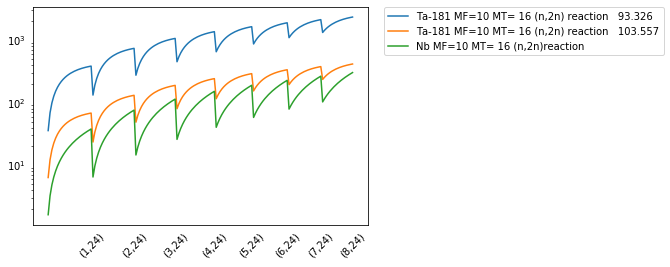

In [33]:
#taとtcの組み合わせでグラフを書く（照射時間が日にちをまたがない）(照射時間と計測時間が重複しないように計算)

import numpy as np


tb = 3600#冷却時間
l = 0.5#箔圧[cm]
r = 1.5#箔の半径
N = 6.022*10**23#アボガドロ定数
DT = 5*10**9

tamax = 9
tcmax= 25

count_list = []
foil_list = []

x = []
ticks = []
i = 1
for ta in range(1,tamax):
    for tc in range(1,tcmax):
        if tc >= ta:
            x.append(i)
            i = i + 1
            
            if tc == tcmax-1:
                ticks.append("(" + str(ta) + "," + str(tc) + ")")
            else:
                ticks.append(" ")
            
#             print("(" + str(ta) + str(tc) + ")")
            


for i in range(len(result_list)):
    count_per_list = []
    
    #relativeはとばす------------------------------------------------------------
    if "*" in result_list[i][12]:
        o = "0"
    
    #relatveではないかつエネルギー、半減期が0ではないときに、諸量を計算------------------------------------------
    else:
        if float(result_list[i][11]) != 0:
            if result_list[i][13] != "0":
                

                if "<" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                elif "~" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                elif ">" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                else:
                    e = float(result_list[i][12])
#                 print(e)
                e = float(e)/100

                a = float(result_list[i][8])#平均原子量
                b = float(result_list[i][7])#存在比
                f = float(result_list[i][15])#Ge検出器効率
                g = float(result_list[i][14])#質量吸収係数
                h = float(result_list[i][10])#平均密度

                #Σσφ
                c = result_list[i][9]
                


                d = ""
                for t in range(len(result_list[i][13])-1):
                    d = d + result_list[i][13][t]
                d = float(d)

                if result_list[i][13][len(result_list[i][13])-1] == "s":
                    d = d
                elif result_list[i][13][len(result_list[i][13])-1] == "m":
                    d = d*60
    #                 print("m")
                elif result_list[i][13][len(result_list[i][13])-1] == "h":
                    d = d*60*60
    #                 print("h")
                elif result_list[i][13][len(result_list[i][13])-1] == "d":
                    d = d*60*60*24
    #                 print("d")
                elif result_list[i][13][len(result_list[i][13])-1] == "y":
                    d = d*60*60*24*365
    #                 print("y")
                    d = float(d)
                for ta in range(1,tamax):
                    for tc in range(1,tcmax):
                        
                        if tc >= ta:
                            count = b * (h*(r*r*3.14)*l)/a * N * c * d/np.log(2) * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f * (1-np.exp(-1*np.log(2)/d*ta*3600)) * np.exp(-1*np.log(2)/d*tb) * (1-np.exp(-1*np.log(2)/d*tc*3600))*DT
                            count_per_list.append(count)
                            
                count_list.append(count_per_list)
                foil_list.append(result_list[i][0]+" " + result_list[i][1]+" " + result_list[i][11])
                
                            
#                 if count > 20:
#                     print(result_list[i])
                
#                 ta = 8
#                 tc = 8
#                 pa = d/np.log(2) * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f * (1-np.exp(-1*np.log(2)/d*ta*3600)) * np.exp(-1*np.log(2)/d*tb) * (1-np.exp(-1*np.log(2)/d*tc*3600))
#                 print((pa,result_list[i]))
#Nbのカウントリスト------------------------------
Nb_a = 92.90637
Nb_b = 1.0
Nb_c = float("1.429090E-1")
Nb_d = 10.15*24*60*60
Nb_e = 0.9907
Nb_f = float("5.61E-03")
Nb_g = 0.0609
Nb_h = 8.57
count_Nb_list = []

for ta in range(1,tamax):
    for tc in range(1,tcmax):
        if tc >= ta:
            count_Nb = Nb_b * (Nb_h*(r*r*3.14)*l)/Nb_a * N * sigma_reaction_Nb * Nb_d/np.log(2) * (1-np.exp(-1*l*Nb_h*Nb_g))/(l*Nb_h*Nb_g) * Nb_e * Nb_f * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600)) * np.exp(-1*np.log(2)/Nb_d*tb) * (1-np.exp(-1*np.log(2)/Nb_d*tc*3600)) * DT
            count_Nb_list.append(count_Nb)
            print(count_Nb)

# ta = 8
# tc = 8
# pa = Nb_d/np.log(2) * (1-np.exp(-1*l*Nb_h*Nb_g))/(l*Nb_h*Nb_g) * Nb_e * Nb_f * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600)) * np.exp(-1*np.log(2)/Nb_d*tb) * (1-np.exp(-1*np.log(2)/Nb_d*tc*3600))
# print(pa)



for i in range(len(count_list)):
    if count_list[i][len(count_list[i])-1] > 1:
        plt.plot(x,count_list[i],label =foil_list[i])
        print(count_list[i][len(count_list[i])-1],foil_list[i])
    
#     else:
#         plt.plot(count_list[i])


plt.plot(x,count_Nb_list,label = "Nb MF=10 MT= 16 (n,2n)reaction")
# plt.legend()
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.xticks(rotation=45)
plt.xticks(x, ticks)
# plt.xlabel("(Irradiation time , Measurement time)", fontsize = 15)
# plt.ylabel("Count", fontsize = 15)

plt.tick_params(bottom=False,
               left=False,
               right=False,
               top=False)
plt.savefig("300_dpi_scatter.png", format="png", dpi=600)
# plt.show()





In [5]:
import matplotlib.pyplot as plt
from cycler import cycler
plt.rcParams['axes.prop_cycle'].by_key()['color']

user_cycle = cycler(color=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#000000','#770000','#007100','#967100','#9671e4'])